### EDA CSV BegInvFINAL12312016

In [29]:
# Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [30]:
#Cargar el dataset
df_InventarioInicial = pd.read_csv("Dataset/BegInvFINAL12312016.csv")
df_InventarioInicial.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [31]:
# Obtener información general del dataset
df_InventarioInicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [32]:
# Descripción estadística básica
df_InventarioInicial.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


In [33]:
# Verificación de valores nulos
df_InventarioInicial.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [34]:
# Verificar si hay filas duplicadas
duplicated_rows = df_InventarioInicial.duplicated()

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

# Mostrar el número de filas duplicadas
print(f'Número de filas duplicadas: {num_duplicated_rows}')

# Opcional: Mostrar las filas duplicadas
if num_duplicated_rows > 0:
    print(df_InventarioInicial[duplicated_rows])

Número de filas duplicadas: 0


In [35]:
#Se verifica el tipo de dato de cada columna
print(df_InventarioInicial.dtypes)

InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
startDate       object
dtype: object


In [36]:
#  Convertir las fechas a formato datetime para análisis de fechas
df_InventarioInicial['startDate'] = pd.to_datetime(df_InventarioInicial['startDate'])

#### La columna StartDate es 100% la fecha 2016-01-01

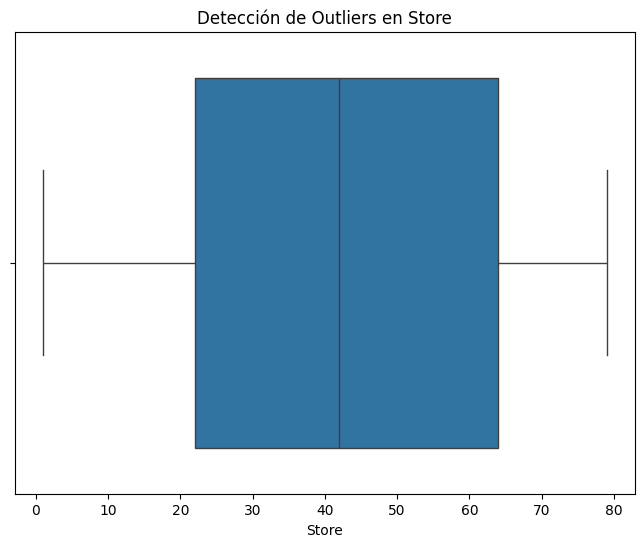

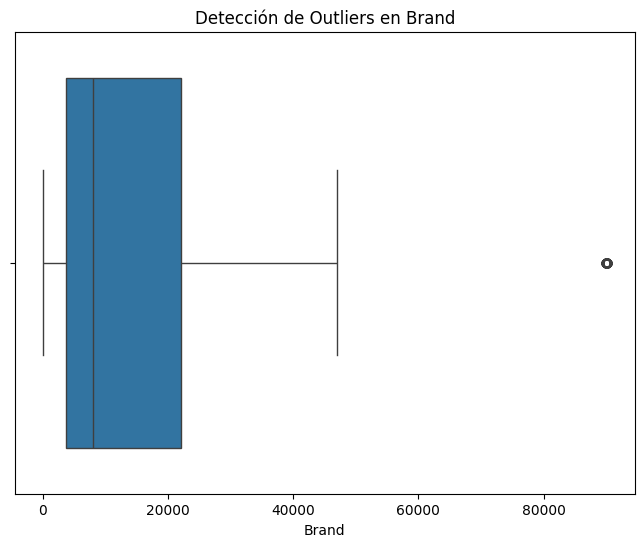

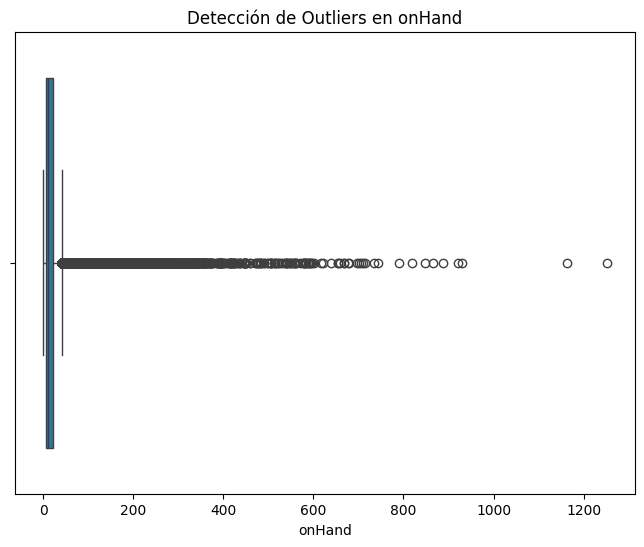

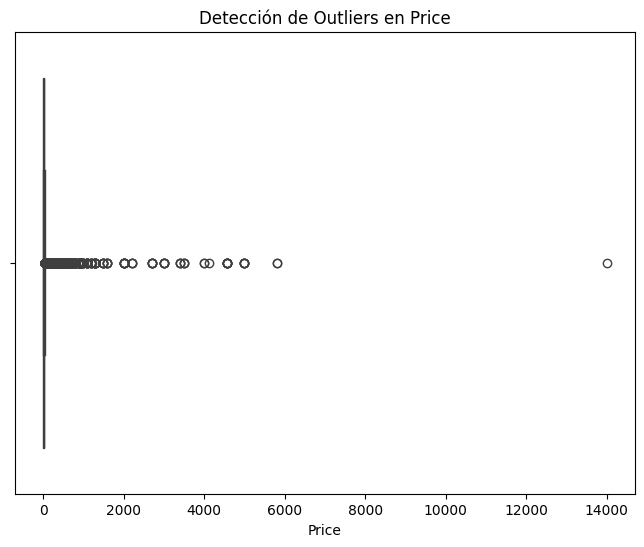

In [37]:
# Detección de outliers columnas (ajusta el nombre de la columna según el dataset)
# Filtrar las columnas numéricas del DataFrame
columnas_numericas = df_InventarioInicial.select_dtypes(include=['float64', 'int64']).columns

# Iterar sobre las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_InventarioInicial[columna])
    plt.title(f'Detección de Outliers en {columna}')
    plt.show()

In [38]:
# Función para detectar y mostrar outliers de una columna
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango Intercuartílico

    # Definir los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar las filas que están fuera de los límites (outliers)
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return outliers

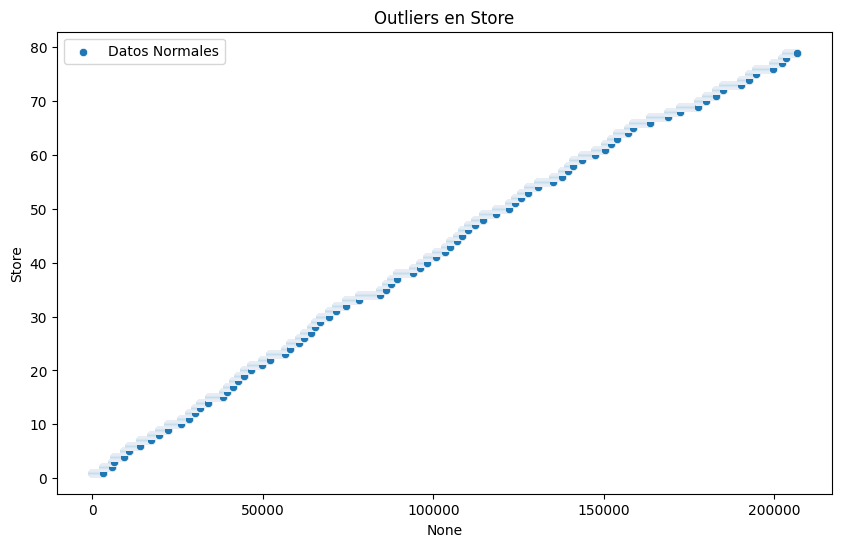

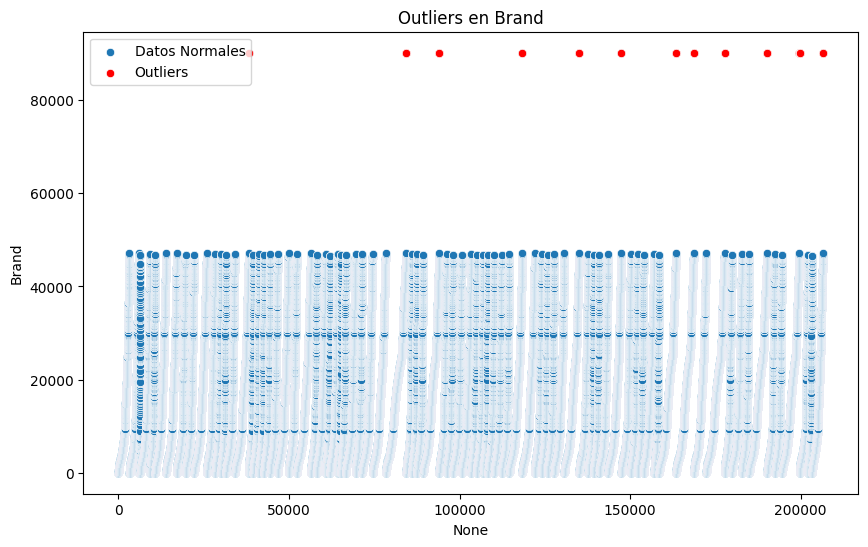

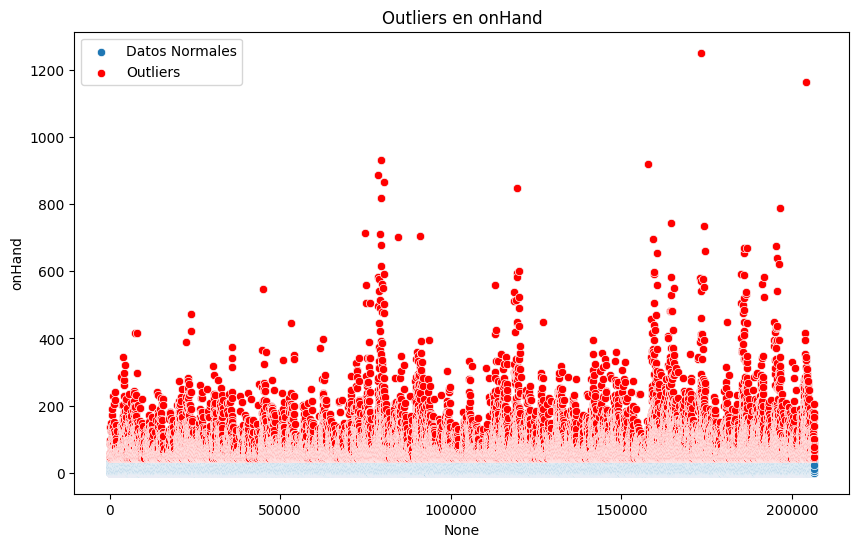

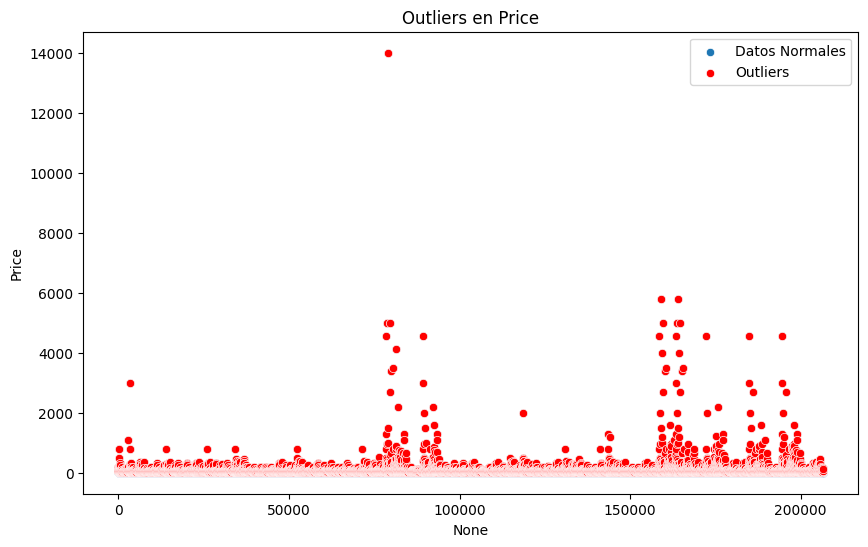

In [39]:
# Gráfico para mostrar outliers junto con datos normales
columnas_a_verificar = df_InventarioInicial.select_dtypes(include=['float64', 'int64']).columns

for columna in columnas_a_verificar:
    plt.figure(figsize=(10,6))
    
    # Graficar los puntos de la columna
    sns.scatterplot(x=df_InventarioInicial.index, y=df_InventarioInicial[columna], label='Datos Normales')

    # Graficar los puntos de los outliers
    outliers = detectar_outliers(df_InventarioInicial, columna)
    sns.scatterplot(x=outliers.index, y=outliers[columna], color='red', label='Outliers')
    
    plt.title(f'Outliers en {columna}')
    plt.legend()
    plt.show()

In [40]:
# Ver las filas con outliers para una columna específica ('Brand')
outliers_Brand = detectar_outliers(df_InventarioInicial, 'Brand')
print(outliers_Brand)

               InventoryId  Store       City  Brand  \
38240    15_WANBORNE_90013     15   WANBORNE  90013   
84373   34_PITMERDEN_90010     34  PITMERDEN  90010   
84374   34_PITMERDEN_90011     34  PITMERDEN  90011   
84375   34_PITMERDEN_90012     34  PITMERDEN  90012   
84376   34_PITMERDEN_90013     34  PITMERDEN  90013   
...                    ...    ...        ...    ...   
199670  76_DONCASTER_90088     76  DONCASTER  90088   
199671  76_DONCASTER_90089     76  DONCASTER  90089   
199672  76_DONCASTER_90090     76  DONCASTER  90090   
206527  79_BALLYMENA_90011     79  BALLYMENA  90011   
206528  79_BALLYMENA_90089     79  BALLYMENA  90089   

                         Description   Size  onHand   Price  startDate  
38240   Ch Leoville Barton 12 St Jul  750mL      12   99.99 2016-01-01  
84373       Ch Smith Haut Lafitte 12  750mL      30   91.99 2016-01-01  
84374   Ch Pichon Longville 12 Pauil  750mL      23  144.99 2016-01-01  
84375    Ch Malartic Lagravier 12 RG  750mL    

In [41]:
# Verificar si hay valores negativos en las columnas numéricas
negatives = df_InventarioInicial.select_dtypes(include=['number']) < 0

# Obtener los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtrar las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Mostrar los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(df_InventarioInicial[df_InventarioInicial[column] < 0])
else:
    print("No hay valores negativos en el DataFrame.")

No hay valores negativos en el DataFrame.


In [42]:
#Se analizan las distintas columnas 

for i in df_InventarioInicial.columns:
    print(i)
    print(df_InventarioInicial[i].describe()) #descripcion basica 
    print('--------------------------------------')

InventoryId
count                 206529
unique                206529
top       79_BALLYMENA_90089
freq                       1
Name: InventoryId, dtype: object
--------------------------------------
Store
count    206529.000000
mean         42.122457
std          23.191393
min           1.000000
25%          22.000000
50%          42.000000
75%          64.000000
max          79.000000
Name: Store, dtype: float64
--------------------------------------
City
count        206529
unique           67
top       MOUNTMEND
freq          14264
Name: City, dtype: object
--------------------------------------
Brand
count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64
--------------------------------------
Description
count                   206529
unique                    7291
top       Jagermeister Liqueur
freq                       459


In [43]:
# Agrupar por 'Store', 'Brand' y 'Description' y sumar el stock de 'onHand'
StockInicialEnTienda = df_InventarioInicial.groupby(['Store', 'Brand', 'Description'])['onHand'].sum().reset_index(name='Stock Inicial Total')

# Ordenar por la columna 'Stock Inicial Total' en orden descendente para ver las combinaciones con mayor stock
StockInicialEnTienda = StockInicialEnTienda.sort_values(by='Stock Inicial Total', ascending=False)

# Seleccionar las 10 combinaciones con mayor stock
top_beg_stock = StockInicialEnTienda.head(10)

# Mostrar la tabla de las 10 tiendas, marcas y nombres con mayor stock
print("Top 10 Marcas con Mayor Stock Inicial por Tienda:")
print(top_beg_stock)


Top 10 Marcas con Mayor Stock Inicial por Tienda:
        Store  Brand              Description  Stock Inicial Total
173397     69   3858         Grey Goose Vodka                 1251
204102     79   3859        Smirnoff 80 Proof                 1163
79437      34   3876        Smirnoff 80 Proof                  930
157944     65   7341      Smirnoff Watermelon                  921
78556      34   1233  Jack Daniels No 7 Black                  888
80298      34   8068         Absolut 80 Proof                  865
119474     50   4261   Capt Morgan Spiced Rum                  848
79432      34   3858         Grey Goose Vodka                  818
196395     76   8068         Absolut 80 Proof                  789
164412     67   3545          Ketel One Vodka                  743


Columnas en top_beg_stock:
Index(['Store', 'Brand', 'Description', 'Stock Inicial Total'], dtype='object')


C:\Users\danip\AppData\Local\Temp\ipykernel_17080\4294482278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_beg_stock['Marca Completa'] = top_beg_stock['Brand'].astype(str) + " - " + top_beg_stock['Description']


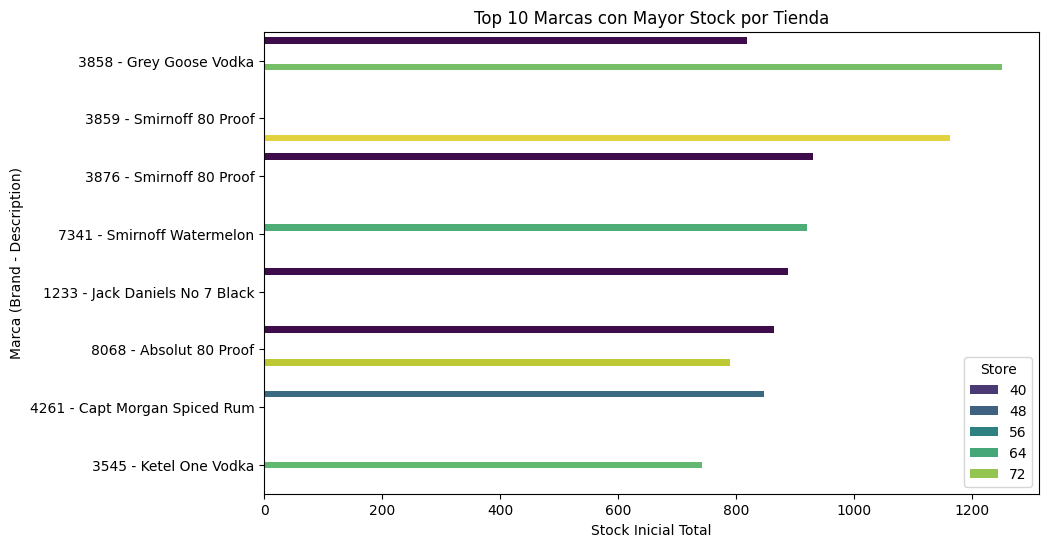

In [44]:
# Verificar los nombres de las columnas en top_beg_stock
print("Columnas en top_beg_stock:")
print(top_beg_stock.columns)

# Crear una nueva columna que combine 'Brand' y 'Description' para mostrar en el gráfico
top_beg_stock['Marca Completa'] = top_beg_stock['Brand'].astype(str) + " - " + top_beg_stock['Description']

# Asegúrate de usar el nombre correcto de la columna para el stock
# Cambia 'Stock Total' por el nombre correcto de la columna que representa el stock total
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock Inicial Total', y='Marca Completa', hue='Store', data=top_beg_stock, palette='viridis')

# Título y etiquetas
plt.title('Top 10 Marcas con Mayor Stock por Tienda')
plt.xlabel('Stock Inicial Total')
plt.ylabel('Marca (Brand - Description)')

plt.show()


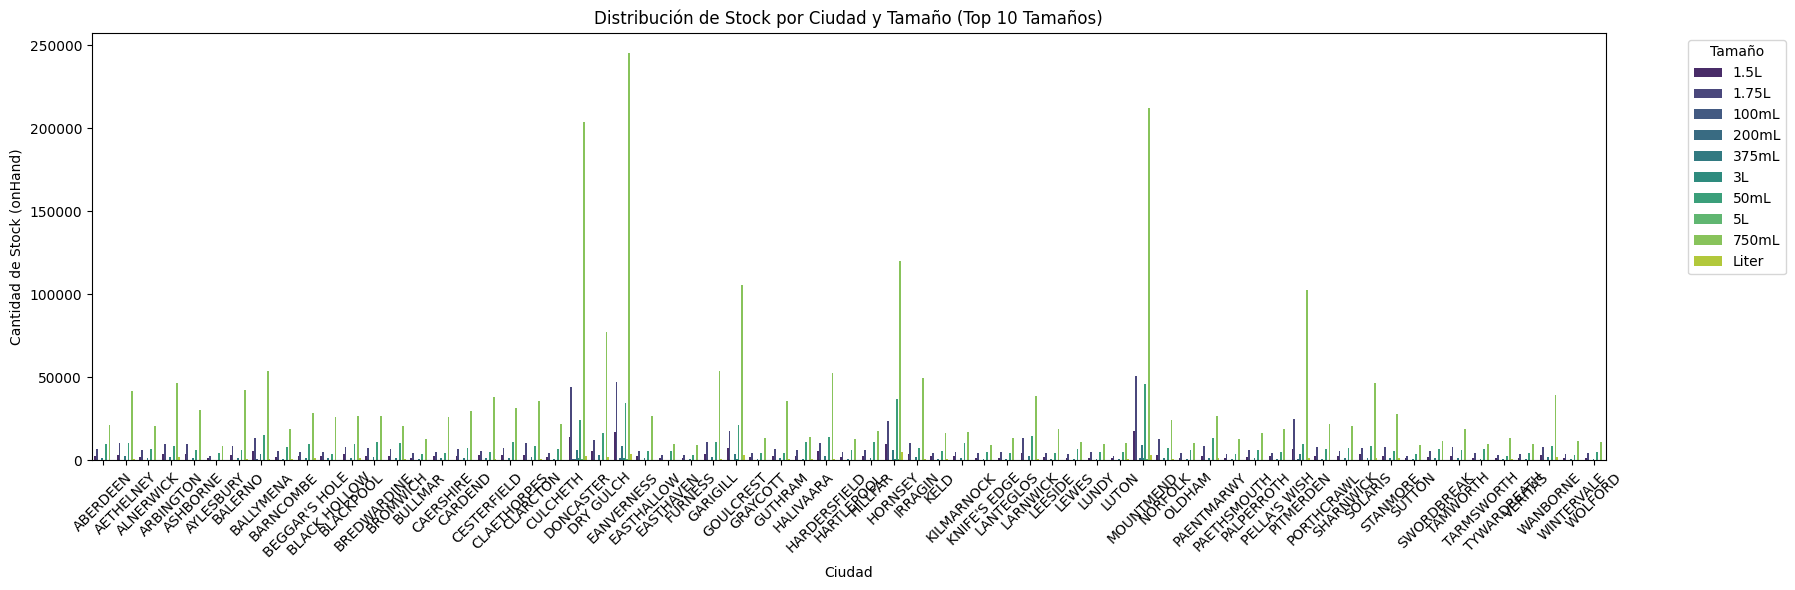

In [45]:
# Calcular el stock total por tamaño
stock_por_tamano1 = df_InventarioInicial.groupby('Size')['onHand'].sum().reset_index()

# Seleccionar los 10 tamaños con mayor stock total
top_tamanos1 = stock_por_tamano1.sort_values(by='onHand', ascending=False).head(10)

# Filtrar el DataFrame original para obtener solo las filas correspondientes a los top 10 tamaños
df_top_tamanos1 = df_InventarioInicial[df_InventarioInicial['Size'].isin(top_tamanos1['Size'])]

# Agrupar por 'City' y 'Size', y sumar el stock
stock_por_ciudad_y_tamano1 = df_top_tamanos1.groupby(['City', 'Size'])['onHand'].sum().reset_index()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(18, 6))
sns.barplot(x='City', y='onHand', hue='Size', data=stock_por_ciudad_y_tamano1, palette='viridis')

# Etiquetas y título
plt.title('Distribución de Stock por Ciudad y Tamaño (Top 10 Tamaños)')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Stock (onHand)')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor legibilidad

# Mostrar el gráfico
plt.legend(title='Tamaño', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajustar la leyenda
plt.tight_layout()  # Ajustar el layout para evitar recortes
plt.show()



C:\Users\danip\AppData\Local\Temp\ipykernel_17080\440533951.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='onHand', y='Size', data=top_tamanos_promedio, palette='viridis')


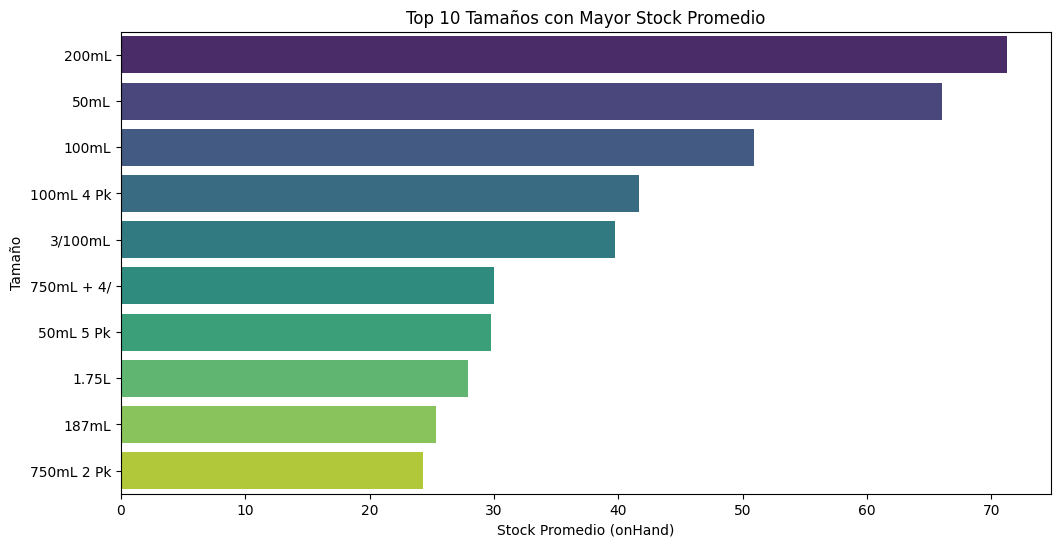

In [46]:
# Calcular el stock promedio por tamaño
promedio_stock_por_tamano = df_InventarioInicial.groupby('Size')['onHand'].mean().reset_index()

# Seleccionar los 10 tamaños con mayor stock promedio
top_tamanos_promedio = promedio_stock_por_tamano.sort_values(by='onHand', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='onHand', y='Size', data=top_tamanos_promedio, palette='viridis')

# Etiquetas y título
plt.title('Top 10 Tamaños con Mayor Stock Promedio')
plt.xlabel('Stock Promedio (onHand)')
plt.ylabel('Tamaño')

# Mostrar el gráfico
plt.show()


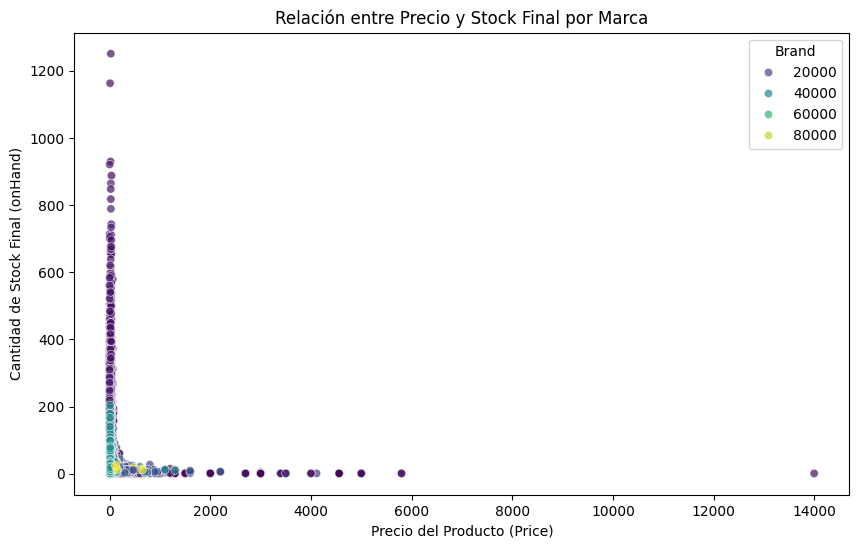

In [47]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='onHand', hue='Brand', data=df_InventarioInicial, palette='viridis', alpha=0.7)

# Etiquetas y título
plt.title('Relación entre Precio y Stock Final por Marca')
plt.xlabel('Precio del Producto (Price)')
plt.ylabel('Cantidad de Stock Final (onHand)')

plt.show()


In [48]:
# Se analizan las columnas con tipo de datos flotantes
# Lista de columnas de tipo flotante
#columns_of_interest = ['InventarioID', 'TiendaID', 'Ciudad', 'ProductoID', 'Descripcion', 'Presentacion', 'Stock_Inicial', 'Precio_venta', 'Fecha_Inicio']
numeric_columns_of_interest = df_InventarioInicial.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores (incluyendo nulos): {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente (freq): {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")

# Iterar sobre las columnas de interés y mostrar las estadísticas
for column in numeric_columns_of_interest:
    print_column_stats(df_InventarioInicial, column)


Estadísticas para la columna 'Store':
Número total de valores (incluyendo nulos): 206529
Número total de valores: 206529.0
Número de valores únicos: 79
Valor más frecuente (top): 34
Frecuencia del valor más frecuente (freq): 6026
Valor mínimo: 1.0
Valor máximo: 79.0
Media: 42.12245737886689

Estadísticas para la columna 'Brand':
Número total de valores (incluyendo nulos): 206529
Número total de valores: 206529.0
Número de valores únicos: 8094
Valor más frecuente (top): 77
Frecuencia del valor más frecuente (freq): 79
Valor mínimo: 58.0
Valor máximo: 90090.0
Media: 13761.482319674235

Estadísticas para la columna 'onHand':
Número total de valores (incluyendo nulos): 206529
Número total de valores: 206529.0
Número de valores únicos: 474
Valor más frecuente (top): 12
Frecuencia del valor más frecuente (freq): 11583
Valor mínimo: 0.0
Valor máximo: 1251.0
Media: 20.429455427567074

Estadísticas para la columna 'Price':
Número total de valores (incluyendo nulos): 206529
Número total de valo

##### 'TiendaID': Diversidad de Tiendas: Con 79 tiendas únicas, AMC-Drinks tiene una red de distribución bastante amplia. Concentración en Tiendas: La tienda 34 tiene la mayor cantidad de registros, indicando que puede ser una tienda clave o de alto volumen. Esto puede sugerir que esta tienda tiene una mayor rotación de productos o es un punto de venta más activo. Distribución Equitativa: La media de 42.12 indica que, en general, los datos están bien distribuidos entre las diferentes tiendas, aunque hay variabilidad en la cantidad de registros por tienda.

##### 'ProductoID': Amplio Portafolio de Productos: La existencia de 8,094 productos únicos sugiere que AMC-Drinks ofrece una amplia variedad de bebidas, lo que puede ser positivo para atraer a diferentes segmentos de clientes. Concentración de Productos: Aunque hay muchos productos, la baja frecuencia del producto 77 indica que la mayoría de los productos no son tan populares, lo que puede ser un área a investigar más a fondo (por ejemplo, qué características tiene el producto más frecuente). Rango Amplio de IDs de Producto: El rango de 58 a 90,090 sugiere que hay un sistema de identificación de productos que permite una alta escalabilidad, aunque se deben investigar los productos de IDs muy altos para comprender su naturaleza.

##### Stock_Inicial: Bajo Stock Inicial Común: Un valor de 12 es el stock más común, lo que sugiere que puede haber un nivel estándar de inventario que AMC-Drinks mantiene para ciertos productos. Esto puede ser una estrategia para garantizar disponibilidad sin excesos. Variabilidad en Stock: Con un stock máximo de 1,251, hay productos que probablemente tienen alta rotación o son estacionales. Esto puede ayudar en la planificación de compras y en las decisiones de almacenamiento. Considerar Productos con Stock Cero: La presencia de valores de 0 en el stock inicial indica que hay productos que no están disponibles en inventario. Esto puede ser un área crítica para abordar y asegurar que los productos populares estén siempre en stock.

##### Precio_venta: Precios de Venta: Un precio más común de 9.99 indica que muchos productos están en un rango de precios accesibles, lo que puede atraer a un amplio rango de consumidores. Rango de Precios: Con un precio que va de 0 a 13,999.9, es evidente que hay una amplia gama de productos, desde los más económicos hasta productos premium. Esto puede permitir a AMC-Drinks atender diferentes segmentos de mercado. Estrategia de Precios: La media de 22.25 sugiere que, en general, el precio promedio es razonable, lo que podría ser un factor en la decisión de compra de los clientes.

##### Diversidad en la Oferta: AMC-Drinks cuenta con un amplio portafolio de productos y una variedad de tiendas, lo que puede ayudar a satisfacer diferentes necesidades de los clientes. Áreas de Mejora en Stock: Hay oportunidades para optimizar el inventario y la disponibilidad de productos, especialmente para aquellos con un stock de 0. Enfoque en Tiendas Clave: Dado que hay una concentración de ventas en algunas tiendas, podría ser beneficioso realizar promociones o incentivos específicos en esas ubicaciones. Análisis de Precios: Evaluar la estructura de precios y realizar ajustes en función de la demanda y la competencia podría maximizar las ganancias y mejorar la satisfacción del cliente.

In [49]:
# Se observan que hay celdas con Price = 0
# Contar el número de celdas con precio igual a 0 en la columna 'Price'
zero_price_count = (df_InventarioInicial['Price'] == 0).sum()

# Mostrar el resultado
print(f"Número de celdas con precio igual a 0 en 'Price': {zero_price_count}")

Número de celdas con precio igual a 0 en 'Price': 2


In [50]:
# Filtrar las filas donde 'Price' es igual a 0
zero_price_rows = df_InventarioInicial[df_InventarioInicial['Price'] == 0]

# Verificar si son el mismo producto basándonos en columnas como 'Description', 'Brand'
# Puedes ajustar las columnas según tus necesidades
grouped = zero_price_rows.groupby(['Description', 'Brand']).size().reset_index(name='count')

# Mostrar las filas agrupadas
print(grouped)

                    Description  Brand  count
0  Gerard Bertrand Organic Rose  19138      2


In [51]:
# Se agrega el precio a Price de "Gerard Bertrand Organic Rose"
# Verificar las filas que contienen "Gerard Bertrand Organic Rose" en la columna Description
gerard_rows = df_InventarioInicial[df_InventarioInicial['Description'].str.contains("Gerard Bertrand Organic Rose", na=False)]
print("\nFilas antes de la actualización:")
print(gerard_rows)

# Actualizar el valor de Price a 2 para "Gerard Bertrand Organic Rose"
df_InventarioInicial.loc[df_InventarioInicial['Description'].str.contains("Gerard Bertrand Organic Rose", na=False), 'Price'] = 50

# Verificar las filas que contienen "Gerard Bertrand Organic Rose" después de la actualización
gerard_rows_updated = df_InventarioInicial[df_InventarioInicial['Description'].str.contains("Gerard Bertrand Organic Rose", na=False)]
print("\nFilas después de la actualización:")
print(gerard_rows_updated)



Filas antes de la actualización:
               InventoryId  Store       City  Brand  \
36829    15_WANBORNE_19138     15   WANBORNE  19138   
175458  69_MOUNTMEND_19138     69  MOUNTMEND  19138   

                         Description   Size  onHand  Price  startDate  
36829   Gerard Bertrand Organic Rose  750mL       0    0.0 2016-01-01  
175458  Gerard Bertrand Organic Rose  750mL       2    0.0 2016-01-01  

Filas después de la actualización:
               InventoryId  Store       City  Brand  \
36829    15_WANBORNE_19138     15   WANBORNE  19138   
175458  69_MOUNTMEND_19138     69  MOUNTMEND  19138   

                         Description   Size  onHand  Price  startDate  
36829   Gerard Bertrand Organic Rose  750mL       0   50.0 2016-01-01  
175458  Gerard Bertrand Organic Rose  750mL       2   50.0 2016-01-01  


In [52]:
# Diccionario que mapea los nombres actuales de las columnas a los nuevos nombres en español
column_renames = {
    'InventoryId': 'InventarioID',
    'Store': 'TiendaID',
    'City': 'Ciudad',
    'Brand': 'ProductoID',
    'Description': 'Descripcion',
    'Size': 'Presentacion',
    'onHand': 'Stock_Inicial',
    'Price': 'Precio_venta',
    'startDate': 'Fecha_Inicio'
}

# Renombrar las columnas
df_InventarioInicial.rename(columns=column_renames, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_InventarioInicial.head())


        InventarioID  TiendaID        Ciudad  ProductoID  \
0  1_HARDERSFIELD_58         1  HARDERSFIELD          58   
1  1_HARDERSFIELD_60         1  HARDERSFIELD          60   
2  1_HARDERSFIELD_62         1  HARDERSFIELD          62   
3  1_HARDERSFIELD_63         1  HARDERSFIELD          63   
4  1_HARDERSFIELD_72         1  HARDERSFIELD          72   

                   Descripcion Presentacion  Stock_Inicial  Precio_venta  \
0  Gekkeikan Black & Gold Sake        750mL              8         12.99   
1       Canadian Club 1858 VAP        750mL              7         10.99   
2     Herradura Silver Tequila        750mL              6         36.99   
3   Herradura Reposado Tequila        750mL              3         38.99   
4         No. 3 London Dry Gin        750mL              6         34.99   

  Fecha_Inicio  
0   2016-01-01  
1   2016-01-01  
2   2016-01-01  
3   2016-01-01  
4   2016-01-01  


In [53]:
#crear el nuevo archivo con las tablas finales
# Seleccionar las columnas deseadas
df_InventarioInicial_Final = df_InventarioInicial[['InventarioID', 'TiendaID', 'Ciudad', 'ProductoID', 'Descripcion', 'Presentacion', 'Stock_Inicial', 'Precio_venta']]

In [54]:
# Guardar el resultado en un archivo CSV para revisarlo
df_InventarioInicial_Final.to_csv('C:/Users/danip/Desktop/AMC-Drinks/Analisis_Inventario_Distribuidora_Licores_AMCDrinks/EDA/Dataset/INVENTARIO_INICIAL_TIENDA.csv', index=False)

In [55]:
df_InventarioInicial_Final.head()

,InventarioID,TiendaID,Ciudad,ProductoID,Descripcion,Presentacion,Stock_Inicial,Precio_venta
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99
